In [1]:
import os
import re
import unidecode

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#--------------------------------------
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Telechargement des données

In [2]:
Current_wd = os.getcwd()
Current_wd

'/home/bryan/OpenClassRoom/SantePublic'

In [3]:
fichier_source = os.path.join(Current_wd, "Data/fr.openfoodfacts.org.products.csv")
fichier_source

'/home/bryan/OpenClassRoom/SantePublic/Data/fr.openfoodfacts.org.products.csv'

In [4]:
df = pd.read_csv(fichier_source, sep = '\t')

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Premiere visualisation

In [5]:
df.shape

(320772, 162)

In [6]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 162 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    code                                        object 
 1    url                                         object 
 2    creator                                     object 
 3    created_t                                   object 
 4    created_datetime                            object 
 5    last_modified_t                             object 
 6    last_modified_datetime                      object 
 7    product_name                                object 
 8    generic_name                                object 
 9    quantity                                    object 
 10   packaging                                   object 
 11   packaging_tags                              object 
 12   brands                                      object 
 13   brands_tags 

# Données manquantes

<AxesSubplot:>

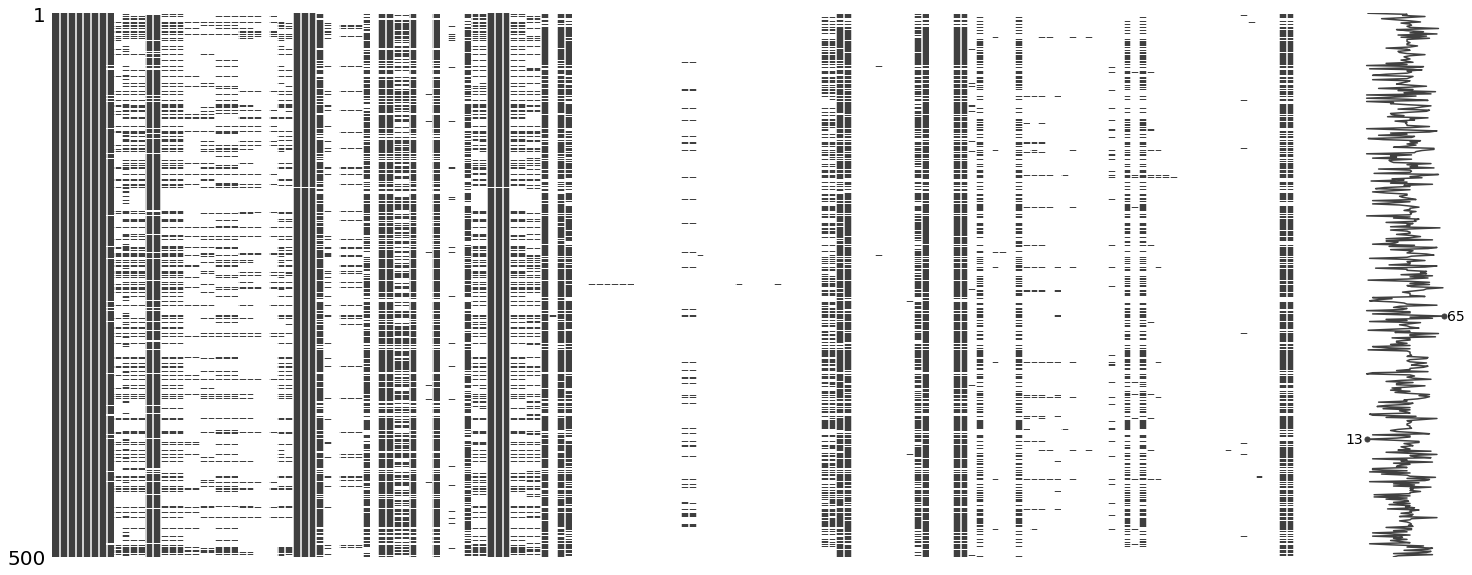

In [7]:
msno.matrix(df.sample(500))

### Colonnes 

In [8]:
df_M = df.copy()

In [9]:
cond = df.notna().sum() == 0
rqdColNul = df.loc[:,cond].columns.tolist()
rqdColNul

['no_nutriments',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'melissic-acid_100g',
 'elaidic-acid_100g',
 'mead-acid_100g',
 'erucic-acid_100g',
 'nervonic-acid_100g',
 'chlorophyl_100g',
 'glycemic-index_100g',
 'water-hardness_100g']

In [10]:
df_M.drop(rqdColNul, axis = 1, inplace = True)

In [11]:
#les colonnes avec moins 0.1% de données renseignées seront supprimées.
thresh = 320772*0.001
thresh

320.772

In [12]:
cond = df_M.notna().sum() < thresh
rqdCol1p = df_M.loc[:,cond].columns.tolist()
rqdCol1p

['cities',
 'allergens_fr',
 'caprylic-acid_100g',
 'capric-acid_100g',
 'lauric-acid_100g',
 'myristic-acid_100g',
 'palmitic-acid_100g',
 'stearic-acid_100g',
 'arachidic-acid_100g',
 'behenic-acid_100g',
 'montanic-acid_100g',
 'alpha-linolenic-acid_100g',
 'eicosapentaenoic-acid_100g',
 'docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 'linoleic-acid_100g',
 'arachidonic-acid_100g',
 'gamma-linolenic-acid_100g',
 'dihomo-gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 'oleic-acid_100g',
 'gondoic-acid_100g',
 'sucrose_100g',
 'glucose_100g',
 'fructose_100g',
 'lactose_100g',
 'maltose_100g',
 'maltodextrins_100g',
 'starch_100g',
 'casein_100g',
 'serum-proteins_100g',
 'nucleotides_100g',
 'beta-carotene_100g',
 'silica_100g',
 'bicarbonate_100g',
 'chloride_100g',
 'fluoride_100g',
 'chromium_100g',
 'molybdenum_100g',
 'iodine_100g',
 'caffeine_100g',
 'taurine_100g',
 'ph_100g',
 'collagen-meat-protein-ratio_100g',
 'carbon-footprint_100g']

In [13]:
df_M.drop(rqdCol1p, axis = 1, inplace = True)

In [14]:
df_M.shape

(320772, 101)

### Individu

In [15]:
#suppression des lignes non renseigné
df_M.dropna(axis=0, how = 'all', inplace = True)

In [16]:
#supression des doublons
#1 - creation d'une colonne doublon.
df_M['doublon'] = df_M['product_name'] + df_M['brands']

In [17]:
df_M.loc[:,'doublon'].duplicated().sum()

50284

In [18]:
#2 - suppression des doublons
df_M.drop_duplicates(subset = 'doublon',keep = 'first' ,inplace = True)
df_M.drop('doublon' , axis = 1 , inplace = True)

In [19]:
#3 - supression des doublons 'code'
df_M.drop_duplicates(subset = 'code', keep = 'first', inplace = True)

In [20]:
df_M.shape

(270412, 101)

<AxesSubplot:>

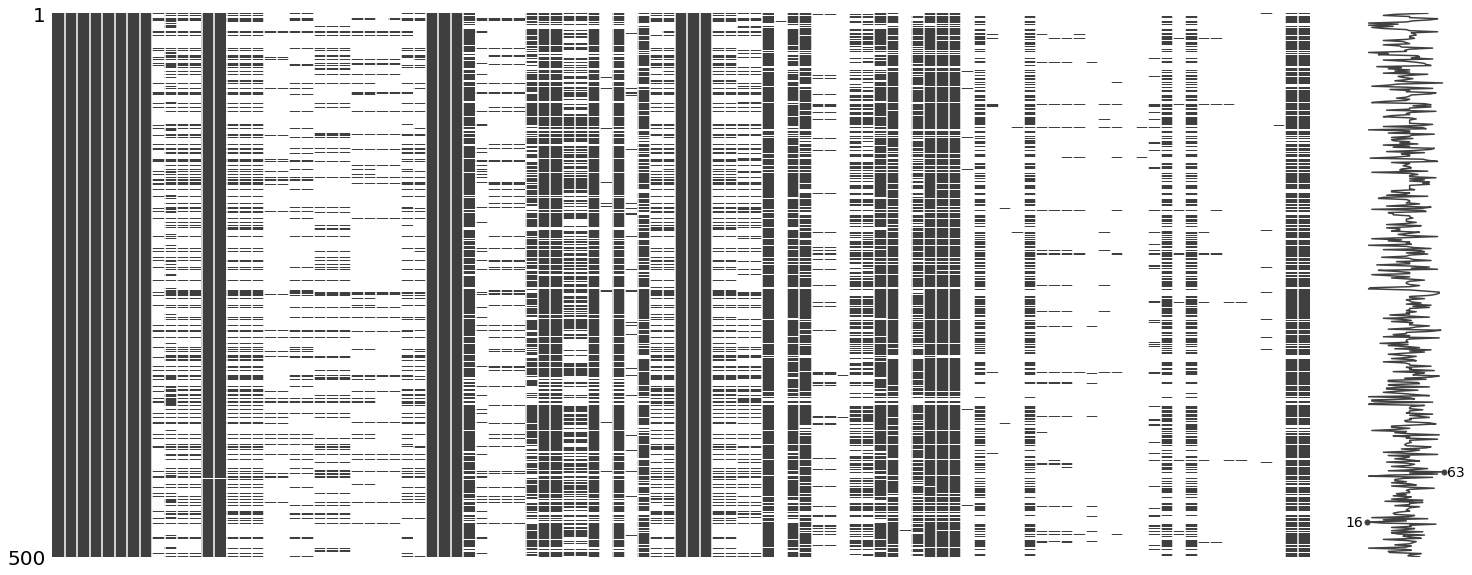

In [21]:
msno.matrix(df_M.sample(500))

## Variables Qualitatives

In [22]:
df_MQ = df_M.select_dtypes(include ='object')

### Valeurs manquantes

In [23]:
data = np.array([df_MQ.notna().sum().values])
columns = df_MQ.columns
df_graph = pd.DataFrame(data = data, columns = columns)

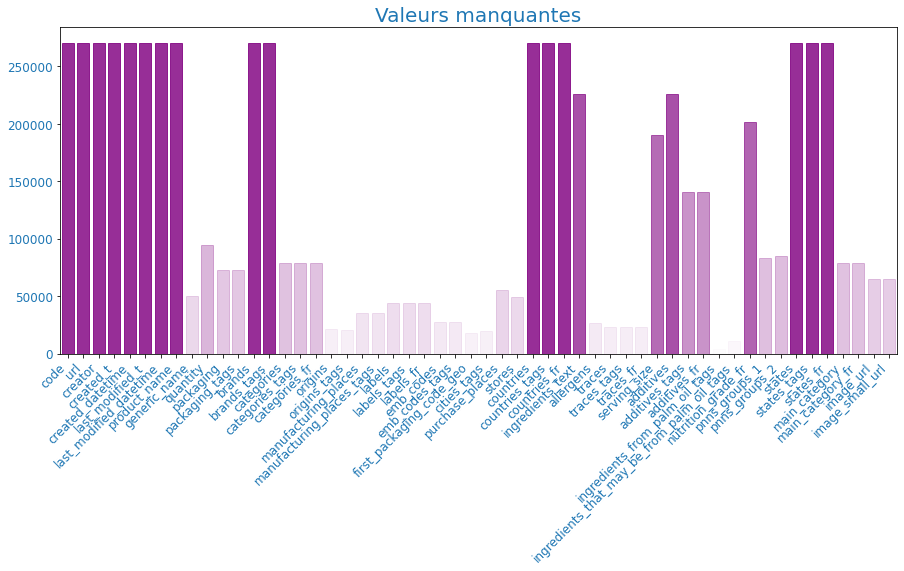

In [24]:
fig, ax = plt.subplots(1,1, figsize = (15,6))
g = sns.barplot(data = df_graph)

for bar in ax.patches:
    bar.set_color('purple')
    alpha_bar = bar.get_height()/330000
    bar.set_alpha(alpha_bar)

for xlabel in ax.xaxis.get_ticklabels():
    xlabel.set_color('tab:blue')
    xlabel.set_rotation(45)
    xlabel.set_fontsize(12)
    xlabel.set_horizontalalignment('right')

for ylabel in ax.yaxis.get_ticklabels():
    # label is a Text instance
    ylabel.set_color('tab:blue')
    ylabel.set_fontsize(12)

plt.title('Valeurs manquantes', color ='tab:blue', fontsize =20 )    
plt.show()

### Suppression des colonnes inutiles pour l'application GLYCEMIECHECK

In [25]:
df_MQ.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_fr',
       'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_fr', 'ingredients_text', 'allergens',
       'traces', 'traces_tags', 'traces_fr', 'serving_size', 'additives',
       'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'image_url', 'image_small_url'],
  

In [26]:
liste_col_inutile = ['url','creator', 'created_t','created_datetime','last_modified_t', 
                     'last_modified_datetime','generic_name', 'quantity', 'packaging', 'packaging_tags',
                     'categories', 'categories_tags', 'origins', 'origins_tags','manufacturing_places',
                     'manufacturing_places_tags', 'labels', 'labels_tags','emb_codes', 'emb_codes_tags', 
                     'first_packaging_code_geo', 'cities_tags', 'purchase_places', 'stores',
                     'traces', 'traces_tags', 'traces_fr', 'serving_size', 'labels', 'labels_tags',
                     'countries','countries_tags','additives','additives_tags','states', 'states_tags', 'states_fr', 
                     'ingredients_from_palm_oil_tags','ingredients_that_may_be_from_palm_oil_tags',
                     'image_url', 'image_small_url', 'main_category']

In [27]:
#supression des colonnes
#le faire sur les deux DataFrame !!!!!!!
df_M.drop(liste_col_inutile, axis = 1, inplace = True)
df_MQ.drop(liste_col_inutile, axis = 1, inplace = True)

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
df_M.shape

(270412, 61)

### Analyse des caracteres des variables qualitatitives.

In [29]:
# columns = df_MQ.columns
data = np.array([df_MQ.nunique().values])
columns = df_MQ.columns
df_unicite_avant = pd.DataFrame(data = data, columns = columns)
data = df_unicite_avant.sort_values(0,axis = 1, ascending = False)
data

,code,product_name,ingredients_text,brands,brands_tags,additives_fr,categories_fr,labels_fr,allergens,main_category_fr,countries_fr,pnns_groups_2,pnns_groups_1,nutrition_grade_fr
0,270412,211136,191665,58376,49919,39401,20373,13184,12568,3268,633,42,14,5


### Netoyage des textes

### Créaton de fonction pour le netoyage

In [30]:
def nettoyage_texte(df,champ):
    cond = df.loc[:, champ].notna() ==  True
    #Remove number
    df.loc[:,champ][cond]= df.loc[:,champ][cond].apply(lambda s: re.sub("\d+", "", s))
    #Remove punctuation
    df.loc[:,champ][cond]=df.loc[:,champ][cond].apply(lambda s: re.sub("[(.,!?:;\-\"='...@#_)]", " ", s))
    #Remove all type of accent
    df.loc[:,champ][cond]=df.loc[:,champ][cond].apply(lambda s: unidecode.unidecode(s))
    #Lower
    df.loc[:,champ][cond]=df.loc[:,champ][cond].apply(lambda s: s.lower())

In [31]:
def nettoyage_texte_country(df,champ):
    cond = df.loc[:, champ].notna() ==  True
    #Remove number
    df.loc[:,champ][cond]= df.loc[:,champ][cond].apply(lambda s: re.sub("\d+", "", s))
    #Remove punctuation
    df.loc[:,champ][cond]=df.loc[:,champ][cond].apply(lambda s: re.sub("[(.,!?:;\"='...@#_)]", " ", s))
    #Remove all type of accent
    df.loc[:,champ][cond]=df.loc[:,champ][cond].apply(lambda s: unidecode.unidecode(s))
    #Lower
    df.loc[:,champ][cond]=df.loc[:,champ][cond].apply(lambda s: s.lower())

In [32]:
liste_champ = df_MQ.columns
liste_champ

Index(['code', 'product_name', 'brands', 'brands_tags', 'categories_fr',
       'labels_fr', 'countries_fr', 'ingredients_text', 'allergens',
       'additives_fr', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2',
       'main_category_fr'],
      dtype='object')

In [33]:
liste = ['brands_tags', 'categories_fr', 'allergens', 'additives_fr',
       'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2',
       'product_name', 'ingredients_text', 'brands',
       'labels_fr', 'main_category_fr']

### Netoyage sur les deux DataFrame

In [34]:
for champ in liste:
    nettoyage_texte(df_MQ,champ)

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [35]:
nettoyage_texte_country(df_MQ,'countries_fr')

In [36]:
for champ in liste:
    nettoyage_texte(df_M,champ)

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
nettoyage_texte_country(df_M,'countries_fr')

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### StopWords

In [38]:
#StopWords et Tokenization
nltk.download('stopwords')
stop = set(stopwords.words(['french', 'english', 'german']))

[nltk_data] Downloading package stopwords to /home/bryan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
def rem_en(input_txt):
    words = str(input_txt).lower().split()
    noise_free_words = [word for word in words if word not in stop] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

## Tokenization

### product_name

In [40]:
#bag_of_words_product_name
#bien effectuées les transformations sur les deux DataBases

cond = df_MQ["product_name"].notna() == True
df_MQ["clean_product_name"]=df_MQ["product_name"].apply(lambda s: rem_en(s))

cond = df_M["product_name"].notna() == True
df_M["clean_product_name"]=df_M["product_name"].apply(lambda s: rem_en(s))

vectorizer = CountVectorizer()
wm_product_name= vectorizer.fit_transform(df_MQ["clean_product_name"])
tokens_product_name = vectorizer.get_feature_names()

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### ingredients_text

In [41]:
#bag_of_words_ingredients_text
cond = df_MQ["ingredients_text"].notna() == True
df_MQ["clean_ingredients_text"]=df_MQ["ingredients_text"].apply(lambda s: rem_en(s))

cond = df_M["ingredients_text"].notna() == True
df_M["clean_ingredients_text"]=df_M["ingredients_text"].apply(lambda s: rem_en(s))

vectorizer = CountVectorizer()
wm_ingredients_text_fr = vectorizer.fit_transform(df_MQ["clean_ingredients_text"])
tokens_ingredients_text = vectorizer.get_feature_names()

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### brands

In [42]:
#bag_of_words_brands
cond = df_MQ["brands"].notna() == True
df_MQ["clean_brands"]=df_MQ["brands"].apply(lambda s: rem_en(s))

cond = df_M["brands"].notna() == True
df_M["clean_brands"]=df_M["brands"].apply(lambda s: rem_en(s))

vectorizer = CountVectorizer()
wm_brands_fr = vectorizer.fit_transform(df_MQ["clean_brands"])

tokens_brands = vectorizer.get_feature_names()

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### labels

In [43]:
#bag_of_words_labels_fr
cond = df_MQ["labels_fr"].notna() == True
df_MQ["clean_labels_fr"]=df_MQ["labels_fr"].apply(lambda s: rem_en(s))

cond = df_M["labels_fr"].notna() == True
df_M["clean_labels_fr"]=df_M["labels_fr"].apply(lambda s: rem_en(s))

vectorizer = CountVectorizer()
wm_labels_fr = vectorizer.fit_transform(df_MQ["clean_labels_fr"])
tokens_labels_fr = vectorizer.get_feature_names()

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### main_category_fr

In [44]:
#bag_of_words_main_category_fr
cond = df_MQ["main_category_fr"].notna() == True
df_MQ["clean_main_category_fr"]=df_MQ["main_category_fr"].apply(lambda s: rem_en(s))

cond = df_M["main_category_fr"].notna() == True
df_M["clean_main_category_fr"]=df_M["main_category_fr"].apply(lambda s: rem_en(s))

vectorizer = CountVectorizer()
wm_main_category_fr = vectorizer.fit_transform(df_MQ["clean_main_category_fr"])
tokens_main_catégory_fr = vectorizer.get_feature_names()

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### countries_fr

In [45]:
#importation database avec les differentes monenclatures des codes pays
nom_fichier = 'country_name.csv'
PATH_DIRECTORY ='/home/bryan/OpenClassRoom/Projet_Nutri/data'
PATH_COMPLET = os.path.join(PATH_DIRECTORY, nom_fichier)
df_country_name = pd.read_csv(PATH_COMPLET, index_col = 0)
#Lower
df_country_name['country_name_fr']=df_country_name['country_name_fr'].apply(lambda s: s.lower())
#accentuation
df_country_name['country_name_fr']=df_country_name['country_name_fr'].apply(lambda s: unidecode.unidecode(s))
df_country_name.head(5)

,code,country_name,country_name_fr
0,AL,Albania,albanie
1,AQ,Antarctica,antarctique
2,DZ,Algeria,algerie
3,AS,American Samoa,samoa americaines
4,AD,Andorra,andorre


In [46]:
checklist = df_country_name['country_name_fr'].tolist()
checklist.append('russie')

In [47]:
countries_fr = df_MQ.loc[:,'countries_fr'].apply(lambda s: str(s).split())
countries_fr

0             [france]
1         [etats-unis]
2         [etats-unis]
3         [etats-unis]
4         [etats-unis]
              ...     
320767      [roumanie]
320768    [etats-unis]
320769         [chine]
320770        [france]
320771    [etats-unis]
Name: countries_fr, Length: 270412, dtype: object

In [48]:
df_MQ['verification_pays'] = [1 if all(elem in checklist for elem in x) else 0 for x in countries_fr]

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_MQ['verification_pays'].sum()

269211

In [50]:
#On recherche les index qui corresponde au valeur nul pour supprimer ses lignes.
cond =df_MQ['verification_pays'] ==0
rqd_nul = df_MQ['verification_pays'][cond].index
rqd_nul

Int64Index([  1346,   7308,  10188,  10253,  10264,  10510,  12973,  13054,
             13121,  13152,
            ...
            320510, 320514, 320515, 320547, 320572, 320616, 320633, 320637,
            320642, 320653],
           dtype='int64', length=1201)

In [51]:
#suppression des lignes
df_MQ.drop(rqd_nul, axis = 0, inplace = True)
df_M.drop(rqd_nul, axis = 0, inplace = True)

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
df_MQ.loc[:,'countries_fr']=df_MQ.loc[:,'countries_fr'].apply(lambda s: re.sub("\-", "", s))
df_M.loc[:,'countries_fr']=df_M.loc[:,'countries_fr'].apply(lambda s: re.sub("\-", "", s))

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [53]:
#bag_of_words_countries_fr
cond = df_MQ["countries_fr"].notna() == True
df_MQ["clean_countries_fr"]=df_MQ["countries_fr"].apply(lambda s: rem_en(s))

cond = df_M["countries_fr"].notna() == True
df_M["clean_countries_fr"]=df_M["countries_fr"].apply(lambda s: rem_en(s))

vectorizer = CountVectorizer()
wm_countries = vectorizer.fit_transform(df_MQ["clean_countries_fr"])
tokens_countries = vectorizer.get_feature_names()


/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
df_vect = pd.DataFrame(data = wm_countries.toarray(),columns = tokens_countries)
df_vect.sum()
df_dist_countries = pd.DataFrame(data =np.array([df_vect.sum().values]), columns = tokens_countries)
df_dist_countries = df_dist_countries.sort_values(0,axis = 1, ascending = False)
df_dist_countries

,etatsunis,france,suisse,allemagne,espagne,royaumeuni,belgique,australie,russie,italie,...,maldives,mongolie,barbade,nigeria,macao,burundi,oman,haiti,guineebissau,guatemala
0,156371,81951,9568,6728,4515,3791,2363,1502,1123,829,...,1,1,1,1,1,1,1,1,1,1


In [55]:
df_graph = df_dist_countries.iloc[:,0:10]
df_graph

,etatsunis,france,suisse,allemagne,espagne,royaumeuni,belgique,australie,russie,italie
0,156371,81951,9568,6728,4515,3791,2363,1502,1123,829


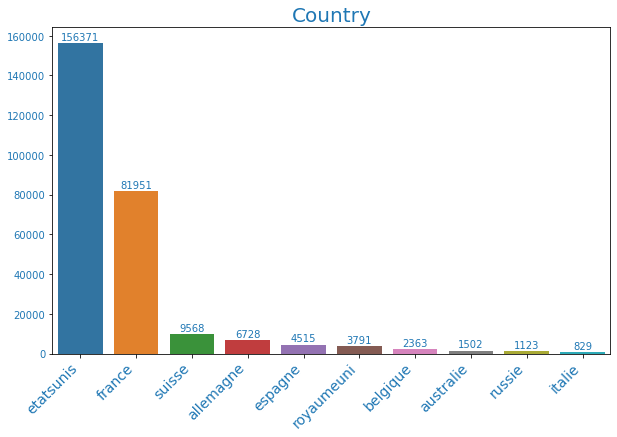

In [56]:
fig, ax = plt.subplots(1,1, figsize =(10,6))

g = sns.barplot(data = df_graph)

for container in ax.containers:
        ax.bar_label(container, padding=1, color = 'tab:blue')
    
for xlabel in ax.xaxis.get_ticklabels():
    xlabel.set_color('tab:blue')
    xlabel.set_rotation(45)
    xlabel.set_ha('right')
    xlabel.set_fontsize(14)
    
for ylabel in ax.yaxis.get_ticklabels():
    ylabel.set_color('tab:blue')
    
plt.title('Country', color ='tab:blue', fontsize =20 )        
plt.show()

In [57]:
df_MQ.drop('verification_pays', axis = 1, inplace = True)

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### pnns_groups1

In [58]:
X = df_MQ['pnns_groups_1'].value_counts(sort=True)

In [59]:
data = np.array([X.values])
columns = X.index
df_graph = pd.DataFrame(data = data, columns = columns)
df_graph

,unknown,sugary snacks,milk and dairy products,beverages,cereals and potatoes,fish meat eggs,composite foods,fruits and vegetables,fat and sauces,salty snacks
0,17852,12011,8352,8048,7911,7544,6524,6455,4743,2617


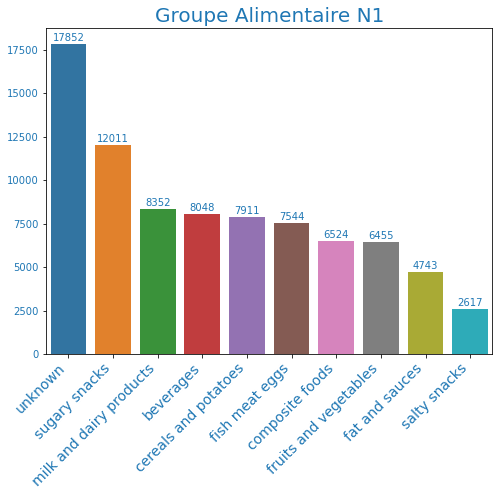

In [60]:
fig, ax = plt.subplots(1,1, figsize = (8,6))

g = sns.barplot(data = df_graph)

for container in ax.containers:
        ax.bar_label(container, padding=1, color = 'tab:blue')
    
for xlabel in ax.xaxis.get_ticklabels():
    xlabel.set_color('tab:blue')
    xlabel.set_rotation(45)
    xlabel.set_ha('right')
    xlabel.set_fontsize(14)
    
for ylabel in ax.yaxis.get_ticklabels():
    ylabel.set_color('tab:blue')

plt.title('Groupe Alimentaire N1', color ='tab:blue', fontsize =20 )  
plt.show()

### pnns_groups2

In [61]:
X = df_MQ['pnns_groups_2'].value_counts(sort=True)

In [62]:
data = np.array([X.values])
columns = X.index
df_graph = pd.DataFrame(data = data, columns = columns)
df_graph

,unknown,one dish meals,biscuits and cakes,sweets,cereals,non sugared beverages,cheese,vegetables,dressings and sauces,milk and yogurt,...,pizza pies and quiche,pastries,soups,dried fruits,eggs,fruit nectars,artificially sweetened beverages,potatoes,tripe dishes,salty and fatty products
0,17852,5365,4357,4263,3868,3849,3787,3543,3269,3108,...,489,479,474,461,429,357,233,151,65,17


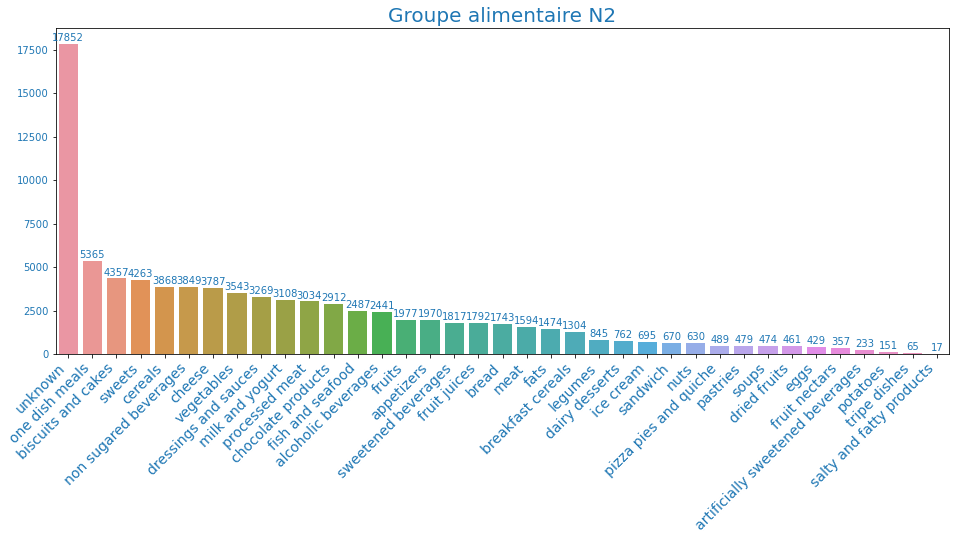

In [63]:
fig, ax = plt.subplots(1,1, figsize = (16,6))

g = sns.barplot(data = df_graph)

i= 0
for container in ax.containers:
    ax.bar_label(container, padding=1, color = 'tab:blue')
    
for xlabel in ax.xaxis.get_ticklabels():
    xlabel.set_color('tab:blue')
    xlabel.set_rotation(45)
    xlabel.set_ha('right')
    xlabel.set_fontsize(14)
    
for ylabel in ax.yaxis.get_ticklabels():
    ylabel.set_color('tab:blue')

plt.title('Groupe alimentaire N2', color ='tab:blue', fontsize =20 )  
plt.show()

### Nutrition Grade

In [64]:
X = df_MQ['nutrition_grade_fr'].value_counts()

In [65]:
data = np.array([X.values])
columns = X.index
df_graph = pd.DataFrame(data = data, columns = columns)
df_graph = df_graph.reindex(sorted(df_graph.columns), axis=1)
df_graph

,a,b,c,d,e
0,32474,30927,41533,56903,38942


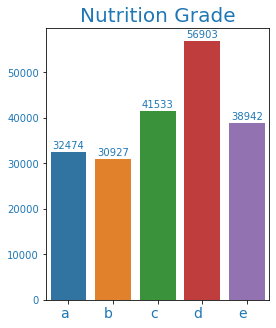

In [66]:
fig, ax = plt.subplots(1,1, figsize = (4,5))

g = sns.barplot(data = df_graph)

i= 0
for container in ax.containers:
    ax.bar_label(container, padding=1, color = 'tab:blue')
    
for xlabel in ax.xaxis.get_ticklabels():
    xlabel.set_color('tab:blue')
    xlabel.set_ha('right')
    xlabel.set_fontsize(14)
    
for ylabel in ax.yaxis.get_ticklabels():
    ylabel.set_color('tab:blue')

plt.title('Nutrition Grade', color ='tab:blue', fontsize =20 )  
plt.show()

## Suppression des colonnes non clean

In [67]:
#suppression des colonnes non clean
liste = ["product_name","ingredients_text","brands","labels_fr","main_category_fr","countries_fr"] 
df_MQ.drop(liste, axis = 1, inplace = True)
df_M.drop(liste, axis = 1, inplace = True)

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Analyse des variations du nombre de caracteres apres netoyage

In [68]:
columns = df_MQ.columns
data = np.array([df_MQ.nunique().values])
df_unicite_apres = pd.DataFrame(data = data, columns = columns)
df_unicite_apres = df_unicite_apres.sort_values(0,axis = 1, ascending = False)
df_unicite_apres

,code,clean_product_name,clean_ingredients_text,brands_tags,clean_brands,additives_fr,categories_fr,clean_labels_fr,allergens,clean_main_category_fr,clean_countries_fr,pnns_groups_2,pnns_groups_1,nutrition_grade_fr
0,269211,193951,177901,49261,48500,39265,20103,12123,11427,3070,431,37,10,5


In [69]:
df_unicite_avant = df_unicite_avant.sort_values(0,axis = 1, ascending = False)
df_unicite_avant

,code,product_name,ingredients_text,brands,brands_tags,additives_fr,categories_fr,labels_fr,allergens,main_category_fr,countries_fr,pnns_groups_2,pnns_groups_1,nutrition_grade_fr
0,270412,211136,191665,58376,49919,39401,20373,13184,12568,3268,633,42,14,5


In [70]:
np.array([df_unicite_avant.columns])

array([['code', 'product_name', 'ingredients_text', 'brands',
        'brands_tags', 'additives_fr', 'categories_fr', 'labels_fr',
        'allergens', 'main_category_fr', 'countries_fr', 'pnns_groups_2',
        'pnns_groups_1', 'nutrition_grade_fr']], dtype=object)

In [71]:
pd_temp1 = pd.DataFrame({"valeur" : df_unicite_avant.values[0],
              "champs" : np.array(df_unicite_avant.columns)})
pd_temp2 = pd.DataFrame({"valeur" : df_unicite_apres.values[0],
              "champs" : np.array(df_unicite_avant.columns)})

In [72]:
pd_temp1['Transformation'] = 'avant'
pd_temp2['Transformation'] = 'apres'
df_comparaison = pd.concat([pd_temp1, pd_temp2])
df_comparaison

,valeur,champs,Transformation
0,270412,code,avant
1,211136,product_name,avant
2,191665,ingredients_text,avant
3,58376,brands,avant
4,49919,brands_tags,avant
5,39401,additives_fr,avant
6,20373,categories_fr,avant
7,13184,labels_fr,avant
8,12568,allergens,avant
9,3268,main_category_fr,avant


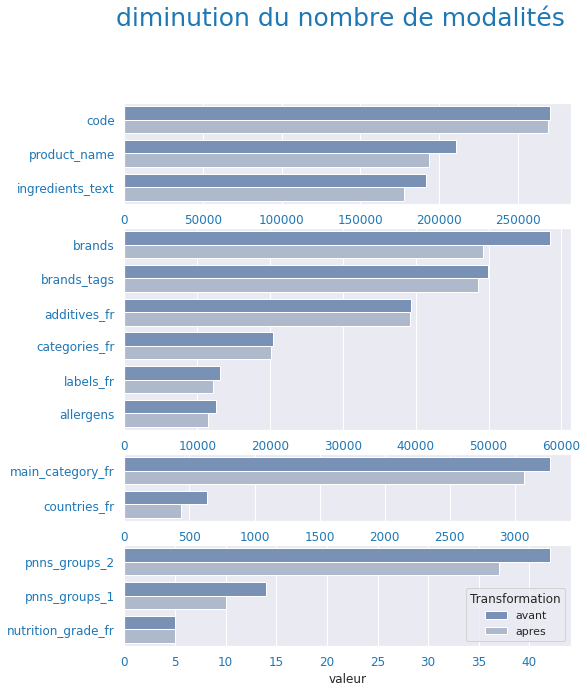

In [73]:
sns.set_theme(palette="vlag")
fig, [ax1, ax2, ax3, ax4] = plt.subplots(4,1, figsize = (8,10), gridspec_kw={'height_ratios': [3,6,2,3]})
plt.suptitle('diminution du nombre de modalités', fontsize = 25, color = 'tab:blue', va = 'bottom')

for ax in [ax1, ax2, ax3, ax4]:

    for xlabel in ax.xaxis.get_ticklabels():
        xlabel.set_color('tab:blue')
        xlabel.set_fontsize(12)
    
    for ylabel in ax.yaxis.get_ticklabels():
        ylabel.set_color('tab:blue')
        ylabel.set_fontsize(12)
        
#graphique avec les valeur >35000-------------------------------

df_comparaison_sup = df_comparaison[df_comparaison['valeur']>60000]
g1= sns.barplot(data = df_comparaison_sup,x= 'valeur', y='champs', hue = 'Transformation', ax = ax1)
g1.set(ylabel=None)

#graphique avec les valeur [35000 ; 8000]-------------------------------
df_comparaison_mid1 = df_comparaison[(df_comparaison['valeur']<60000) & (df_comparaison['valeur']>8000)]
g2= sns.barplot(data = df_comparaison_mid1,x= 'valeur', y='champs', hue = 'Transformation', ax = ax2)
g2.set(ylabel=None)

#graphique avec les valeur [8000 ; 300]-------------------------------
df_comparaison_mid2 = df_comparaison[(df_comparaison['valeur']<8000) & (df_comparaison['valeur']>300)]
g3= sns.barplot(data = df_comparaison_mid2,x= 'valeur', y='champs', hue = 'Transformation', ax = ax3)
g3.set(ylabel=None)

#graphique avec les valeur <300------------------------------
df_comparaison_low = df_comparaison[df_comparaison['valeur']<300]
g4= sns.barplot(data = df_comparaison_low,x= 'valeur', y='champs', hue = 'Transformation', ax = ax4)
g4.set(ylabel=None)

ax1.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)
ax3.legend([],[], frameon=False)



plt.show()

## Selection du pays

In [74]:
df_MQ['clean_countries_fr'].apply(lambda s: s.split())

0            [france]
1         [etatsunis]
2         [etatsunis]
3         [etatsunis]
4         [etatsunis]
             ...     
320767     [roumanie]
320768    [etatsunis]
320769        [chine]
320770       [france]
320771    [etatsunis]
Name: clean_countries_fr, Length: 269211, dtype: object

### Normalize words

In [75]:
df_MQ.columns.get_loc('clean_countries_fr')

13

In [76]:
df_dist_countries

,etatsunis,france,suisse,allemagne,espagne,royaumeuni,belgique,australie,russie,italie,...,maldives,mongolie,barbade,nigeria,macao,burundi,oman,haiti,guineebissau,guatemala
0,156371,81951,9568,6728,4515,3791,2363,1502,1123,829,...,1,1,1,1,1,1,1,1,1,1


In [77]:
liste_check = df_dist_countries.iloc[:,0:10].columns.tolist()
liste_check

['etatsunis',
 'france',
 'suisse',
 'allemagne',
 'espagne',
 'royaumeuni',
 'belgique',
 'australie',
 'russie',
 'italie']

In [78]:
for country in liste_check:
    df_MQ[country]  = [1 if any(w in x for w in country.split()) else 0 for x in df_MQ['clean_countries_fr'].apply(lambda s: s.split())]

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
for pays in liste_check:
    print(pays)
    df_M[pays]=[1 if any(w in x for w in pays.split()) else 0 for x in df_M['clean_countries_fr'].apply(lambda s: s.split())]

etatsunis
france
suisse
allemagne
espagne
royaumeuni
belgique
australie
russie
italie


In [80]:
df_MQ['suisse'].sum()

9568

### COMPREHENSION LIST : exemple a conserver (avec plusieurs boucle for et any)

In [81]:
df_MQ['select_country']=[1 if any(w in x for w in liste_check) else 0 for x in df_MQ['clean_countries_fr'].apply(lambda s: s.split())]

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
df_M['select_country']=[1 if any(w in x for w in liste_check) else 0 for x in df_M['clean_countries_fr'].apply(lambda s: s.split())]

In [83]:
df_MQ['select_country'].sum()

264919

In [84]:
df_M['select_country'].sum()

264919

In [85]:
cond = df_MQ['select_country'] == 1
df_MQ = df_MQ[cond]
df_MQ.shape

(264919, 25)

In [86]:
cond = df_M['select_country'] == 1
df_M = df_M[cond]
df_M.shape

(264919, 72)

# Variables Qualitatives

In [87]:
df_MN = df_M.select_dtypes(include = 'float')
df_MN.shape

(264919, 47)

## Valeures manquantes

<AxesSubplot:>

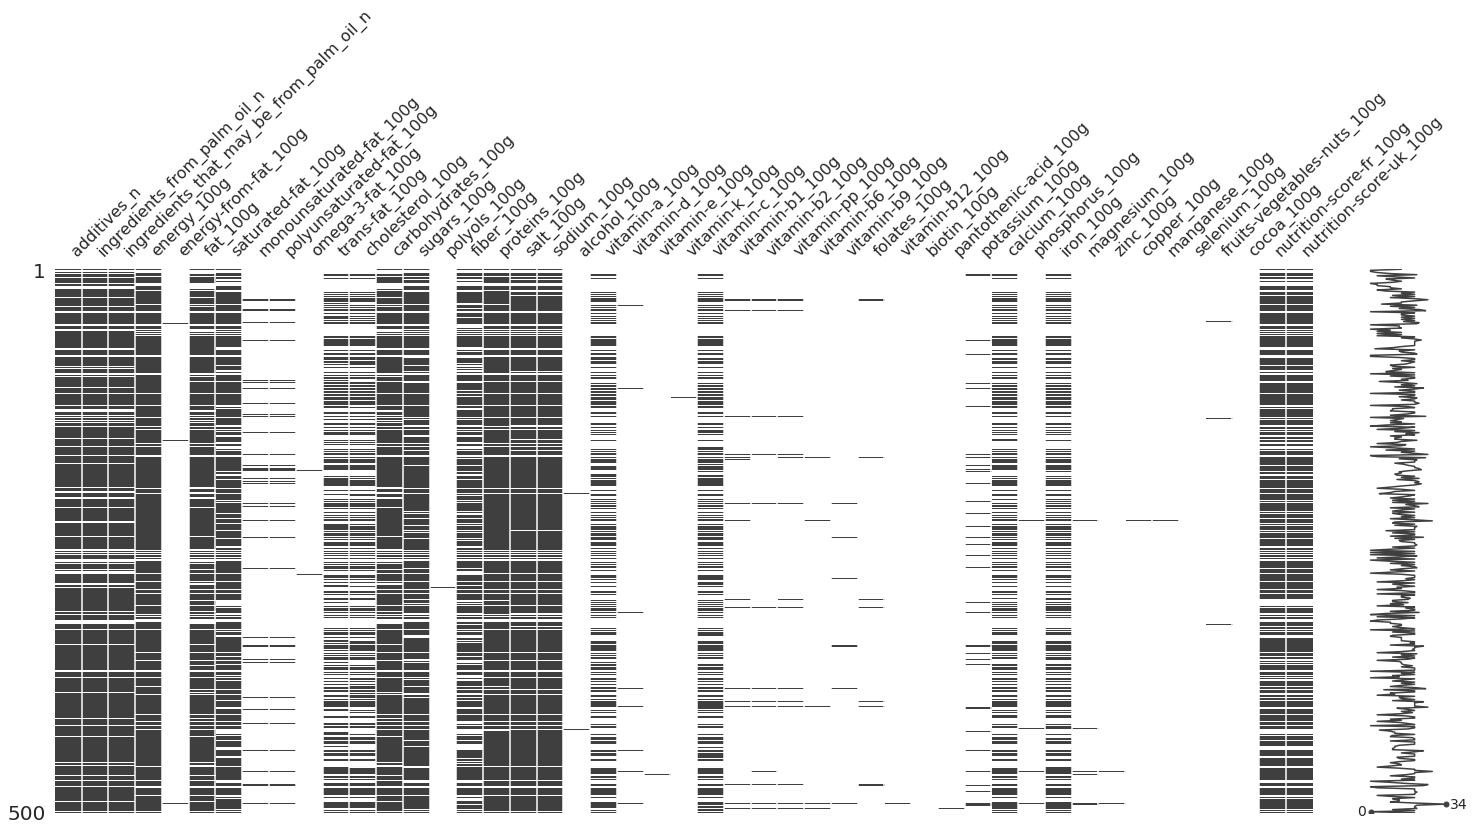

In [88]:
msno.matrix(df_MN.sample(500))

In [89]:
data = np.array([df_MN.notna().sum().values])
columns = df_MN.columns
df_graph = pd.DataFrame(data = data, columns = columns)

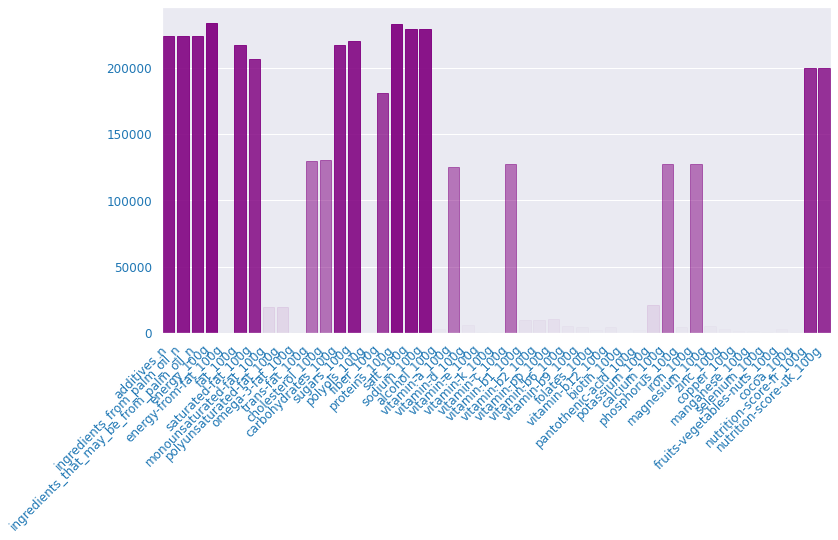

In [90]:
fig, ax = plt.subplots(1,1, figsize = (12,6))

g = sns.barplot(data = df_graph)

for xlabel in ax.xaxis.get_ticklabels():
    xlabel.set_color('tab:blue')
    xlabel.set_fontsize(12)
    xlabel.set_rotation(45)
    xlabel.set_ha('right')

for ylabel in ax.yaxis.get_ticklabels():
    ylabel.set_color('tab:blue')
    ylabel.set_fontsize(12)

for bar in ax.patches:
    bar.set_color('purple')
    alpha_bar = (bar.get_height()/250000)
    bar.set_alpha(alpha_bar)

plt.show()

### rapide observation avant opération sur les données

In [91]:
idx=['count','max', 'min', 'mean', 'std']
pd.DataFrame(df_MN).describe().round(2).loc[idx,:].T.sort_values(by = 'count', ascending = False)

,count,max,min,mean,std
energy_100g,233949.0,3251373.00,0.00,1144.25,6801.12
proteins_100g,232847.0,430.00,-800.00,7.11,8.42
salt_100g,229483.0,64312.80,0.00,2.07,135.18
sodium_100g,229450.0,25320.00,0.00,0.82,53.22
additives_n,223910.0,31.00,0.00,1.94,2.51
ingredients_that_may_be_from_palm_oil_n,223910.0,6.00,0.00,0.06,0.27
ingredients_from_palm_oil_n,223910.0,2.00,0.00,0.02,0.14
sugars_100g,220141.0,3520.00,-17.86,15.90,22.34
fat_100g,217244.0,714.29,0.00,12.67,17.37
carbohydrates_100g,216963.0,2916.67,0.00,32.24,29.80


In [92]:
#second essaie
df_test = df_MN.notna().sum()
cond = df_test.values < 10000
rqdCol = df_test[cond].index
print(rqdCol)
df_MN.drop(rqdCol, axis = 1, inplace = True)
df_M.drop(rqdCol, axis = 1, inplace = True)

Index(['energy-from-fat_100g', 'omega-3-fat_100g', 'polyols_100g',
       'alcohol_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g',
       'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-b6_100g',
       'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g',
       'pantothenic-acid_100g', 'phosphorus_100g', 'magnesium_100g',
       'zinc_100g', 'copper_100g', 'manganese_100g', 'selenium_100g',
       'fruits-vegetables-nuts_100g', 'cocoa_100g'],
      dtype='object')


/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [93]:
df_MN.shape

(264919, 24)

## Nutrition score

In [94]:
idx=['count','max', 'min', 'mean', 'std']
pd.DataFrame(df_MN[['nutrition-score-fr_100g','nutrition-score-uk_100g']]).describe().round(2).loc[idx,:].T

,count,max,min,mean,std
nutrition-score-fr_100g,199446.0,40.0,-15.0,9.15,9.06
nutrition-score-uk_100g,199446.0,40.0,-15.0,9.05,9.19


In [95]:
#les deux colonnes sont similaire, nous allons supprimer le Nutrition score uk
#Nous supprimons les valeurs non rensignées pour cette colonne.
#Il n'y a pas d'outliers.

In [96]:
df_MN.drop('nutrition-score-uk_100g', axis = 1, inplace = True)
df_M.drop('nutrition-score-uk_100g', axis = 1, inplace = True)

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [97]:
cond = df_MN.loc[:,'nutrition-score-fr_100g' ].isna()
rqdIndex = df_MN[cond].index
rqdIndex

Int64Index([     0,      4,      5,      6,      8,      9,     10,     11,
                13,     14,
            ...
            320737, 320743, 320749, 320750, 320758, 320759, 320761, 320765,
            320770, 320771],
           dtype='int64', length=65473)

In [98]:
df_MN.drop(rqdIndex, axis = 0 , inplace = True)
df_M.drop(rqdIndex, axis = 0 , inplace = True)

In [99]:
df_MN.shape

(199446, 23)

## Gestions des outliers

### pour les variables qui doivent etre comprise entre 0 et 100g

In [100]:
liste_col_100 = df_MN.columns.tolist()
liste_col_100.remove('energy_100g')
liste_col_100.remove('additives_n')
liste_col_100.remove('nutrition-score-fr_100g')

In [101]:
#detection des outliers > 100
for champ in liste_col_100:
    cond = df_MN.loc[:,champ]>100
    rqdIndex = df_MN[cond].index.tolist()
    if len(rqdIndex) > 0 :
        print(f"le champ {champ} a {len(rqdIndex)} outlier(s)")
#remplacement des outliers par np.nan
    df_MN.loc[rqdIndex,champ]= np.nan
    df_M.loc[rqdIndex,champ]= np.nan

le champ fat_100g a 3 outlier(s)
le champ saturated-fat_100g a 2 outlier(s)
le champ monounsaturated-fat_100g a 1 outlier(s)
le champ trans-fat_100g a 5 outlier(s)
le champ carbohydrates_100g a 10 outlier(s)
le champ sugars_100g a 6 outlier(s)
le champ fiber_100g a 2 outlier(s)
le champ proteins_100g a 1 outlier(s)
le champ salt_100g a 45 outlier(s)
le champ sodium_100g a 19 outlier(s)
le champ potassium_100g a 1 outlier(s)
le champ calcium_100g a 4 outlier(s)


/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [102]:
#detection des outliers < 0 
for champ in liste_col_100:
    cond = df_MN.loc[:,champ]<0
    rqdIndex = df_MN[cond].index.tolist()
    if len(rqdIndex) > 0 :
        print(f"le champ {champ} a {len(rqdIndex)} outlier(s)")

le champ trans-fat_100g a 4 outlier(s)
le champ sugars_100g a 6 outlier(s)
le champ vitamin-c_100g a 1 outlier(s)
le champ iron_100g a 1 outlier(s)


In [103]:
#on remplace les outliers négatifs avec sa valeurs absolue
filtre = df_MN.loc[:,liste_col_100]>0
df_MN.loc[:,liste_col_100]= df_MN.where(filtre, df_MN.abs())

In [104]:
filtre = df_MN.loc[:,liste_col_100]>0
df_M.loc[:,liste_col_100]= df_MN.where(filtre, df_MN.abs())

###  pour les variables sans limite supérieures

In [105]:
liste_col = ['energy_100g']

In [106]:
#Identification des outliers sup
for champ in liste_col:
    q1 = df_MN.loc[:, champ].quantile(0.25)
    q3 = df_MN.loc[:, champ].quantile(0.75)
    IQR = q3-q1
    upper_bound = q3 + (1.5 * IQR)
    print(upper_bound)
    cond = df_MN.loc[:,champ] > upper_bound
    rqdOutliers = df_MN.loc[:,champ][cond].index.tolist()
    print(f"le champ {champ} a {len(rqdOutliers)} outlier(s)")
#remplacement de l'outlier par la valeur NaN
    df_MN.loc[rqdOutliers,champ] = np.nan
    df_M.loc[rqdOutliers,champ] = np.nan

3593.0
le champ energy_100g a 656 outlier(s)


In [107]:
#on remplace les outliers négatifs avec sa valeurs absolue
filtre = df_MN.loc[:,liste_col]>0
df_MN.loc[:,liste_col_100]= df_MN.where(filtre, df_MN.abs())

In [108]:
filtre = df_MN.loc[:,liste_col]>0
df_M.loc[:,liste_col_100]= df_MN.where(filtre, df_MN.abs())

## Les valeurs manquantes

In [109]:
idx=['count','max', 'min', 'mean', 'std']
pd.DataFrame(df_MN).describe().round(2).loc[idx,:].T.sort_values(by = 'count', ascending = False)

,count,max,min,mean,std
nutrition-score-fr_100g,199446.0,40.00,-15.0,9.15,9.06
proteins_100g,199295.0,100.00,0.0,7.79,8.04
saturated-fat_100g,199294.0,100.00,0.0,4.97,7.58
sugars_100g,199290.0,100.00,0.0,14.94,19.78
sodium_100g,199277.0,92.50,0.0,0.50,1.67
salt_100g,199251.0,100.00,0.0,1.25,3.93
energy_100g,198640.0,3590.00,0.0,1171.23,745.73
fat_100g,182555.0,100.00,0.0,13.33,15.98
carbohydrates_100g,182529.0,100.00,0.0,33.39,28.35
ingredients_from_palm_oil_n,177622.0,2.00,0.0,0.02,0.15


### Matrice de correlation

In [110]:
#on selectionne les variables ou les corrélations sont le plus élevé
corr_df = df_MN.corr(method='pearson')
X = corr_df.abs().sum()
X.sort_values(ascending = False)
cond = X > 4
rqdCol = X[cond].index
rqdCol

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
       'carbohydrates_100g', 'nutrition-score-fr_100g'],
      dtype='object')

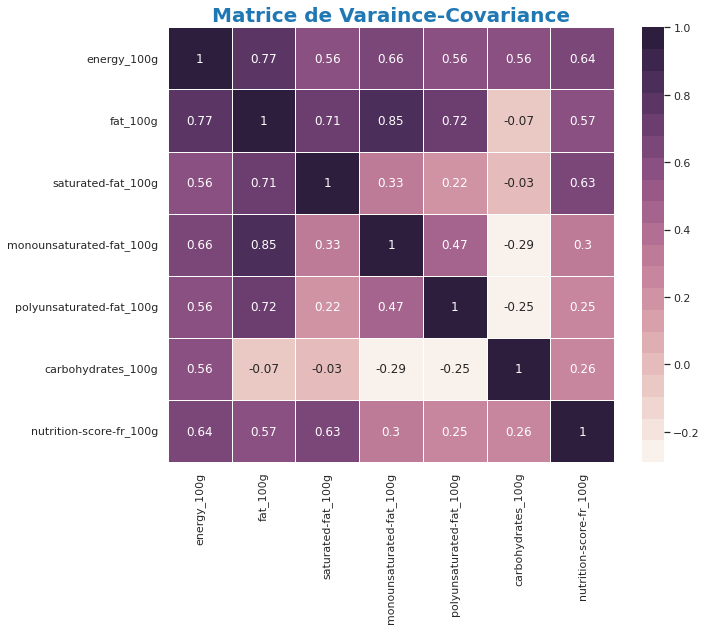

In [111]:
corr_df =df_MN.loc[:,rqdCol].corr(method='pearson')
plt.figure(figsize=(10, 8))
cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15)
sns.heatmap(corr_df.round(2), annot=True,cmap=cmap, linewidths=1)
plt.title("Matrice de Varaince-Covariance", fontsize=20, color='tab:blue', fontweight="bold")
plt.show()

In [112]:
#on selectionne les variables pour lesquelles les données manquantes ne sont pas trop importante.
cond = df_MN.loc[:,rqdCol].isna().sum() < 20000
rqd_col2 = df_MN.loc[:,rqdCol].isna().sum()

### KNN Imputer

In [113]:
from sklearn.impute import KNNImputer

In [114]:
#deconpostion des datas
X = df_MN.loc[:,('energy_100g','nutrition-score-fr_100g')].values
features = ['energy_100g','nutrition-score-fr_100g']
X.shape

(199446, 2)

In [115]:
#instanciation de l'objet:
knn_impute = KNNImputer(n_neighbors = 2)
X_impute = knn_impute.fit_transform(X)
X_impute

array([[2.243e+03, 1.400e+01],
       [1.941e+03, 0.000e+00],
       [2.540e+03, 1.200e+01],
       ...,
       [2.406e+03, 0.000e+00],
       [2.100e+01, 2.000e+00],
       [0.000e+00, 0.000e+00]])

In [116]:
#on remplace les valeurs NaN par l'estimation faite par notre modele KNN
df_MN.loc[:, features] = X_impute
df_M.loc[:, features] = X_impute

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [117]:
df_MN.loc[:, features].isna().sum()

energy_100g                0
nutrition-score-fr_100g    0
dtype: int64

In [118]:
#on verifie la cohérence des imputatons
idx = ['max', 'min', 'mean', 'std']
pd.DataFrame(df_MN.loc[:,features]).describe().round(2).loc[idx].T

,max,min,mean,std
energy_100g,3590.0,0.0,1174.33,746.08
nutrition-score-fr_100g,40.0,-15.0,9.15,9.06


## Iterative Imputer

In [119]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [120]:
corr_df = df_MN.corr(method='pearson')

In [121]:
df_MNTest = df_MN.copy()

In [122]:
itv_imputer = IterativeImputer(n_nearest_features = 5,imputation_order='ascending',
                              min_value=0, max_value = 100)
X = df_MNTest.values
features = df_MNTest.columns

X_impute= itv_imputer.fit_transform(X)

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [123]:
df_MNTest.loc[:,features]=X_impute
df_MN.loc[:,features]=X_impute
df_M.loc[:,features]=X_impute

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [124]:
idx=['count','max', 'min', 'mean', 'std']
pd.DataFrame(df_MNTest).describe().round(2).loc[idx,:].T.sort_values(by = 'count', ascending = False)

,count,max,min,mean,std
additives_n,199446.0,31.00,0.0,1.99,2.41
fiber_100g,199446.0,100.00,0.0,2.71,4.26
iron_100g,199446.0,25.00,0.0,0.00,0.07
calcium_100g,199446.0,82.00,0.0,0.10,0.36
potassium_100g,199446.0,66.67,0.0,0.32,0.29
vitamin-pp_100g,199446.0,21.43,0.0,0.01,0.06
vitamin-c_100g,199446.0,35.71,0.0,0.01,0.10
vitamin-a_100g,199446.0,0.12,0.0,0.00,0.00
sodium_100g,199446.0,92.50,0.0,0.50,1.67
salt_100g,199446.0,100.00,0.0,1.26,4.09


## Distribution

In [125]:
df_MNTest = df_MN.copy()

In [126]:
#scaling
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = df_MNTest
features = df_MNTest.columns
X_scaled = std.fit_transform(X)
df_MNTest_std = pd.DataFrame(data = X_scaled, columns = features)

In [127]:
idx=['count','max', 'min', 'mean', 'std']
pd.DataFrame(df_MNTest_std).describe().round(2).loc[idx,:].T.sort_values(by = 'count', ascending = False)

,count,max,min,mean,std
additives_n,199446.0,12.05,-0.83,-0.0,1.0
fiber_100g,199446.0,22.86,-0.64,0.0,1.0
iron_100g,199446.0,334.52,-0.04,0.0,1.0
calcium_100g,199446.0,226.99,-0.27,-0.0,1.0
potassium_100g,199446.0,225.04,-1.09,-0.0,1.0
vitamin-pp_100g,199446.0,331.33,-0.21,-0.0,1.0
vitamin-c_100g,199446.0,356.25,-0.07,0.0,1.0
vitamin-a_100g,199446.0,209.55,-0.25,-0.0,1.0
sodium_100g,199446.0,55.23,-0.30,-0.0,1.0
salt_100g,199446.0,24.14,-0.31,-0.0,1.0


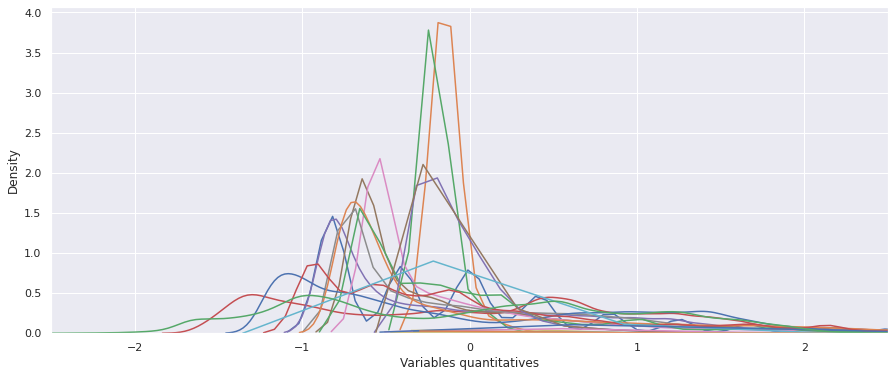

In [143]:
fig, ax = plt.subplots(1,1, figsize = (15,6))

plt.xlim(-2.5, 2.5)
for champ in df_MNTest_std.columns:
    sns.kdeplot(df_MNTest_std.loc[:,champ], legend = True, ax = ax, palette ='deep')

plt.xlabel('Variables quantitatives')
plt.show()

In [138]:
data = df_MNTest_std.loc[:,('fat_100g','carbohydrates_100g','proteins_100g')].values
columns = df_MNTest_std.loc[:,('fat_100g','carbohydrates_100g','proteins_100g')].columns
df_graph = pd.DataFrame(data = data, columns = columns)
df_graph

,fat_100g,carbohydrates_100g,proteins_100g
0,0.964587,1.117559,-0.525331
1,0.285934,0.988805,1.252190
2,2.774962,-0.552281,1.252190
3,0.342330,0.884507,0.779512
4,1.477854,0.124214,1.104167
...,...,...,...
199441,-0.845788,1.936474,-0.822621
199442,-0.668363,1.495547,0.647659
199443,1.058525,0.245113,1.670138
199444,-0.833115,-1.176628,-0.907205


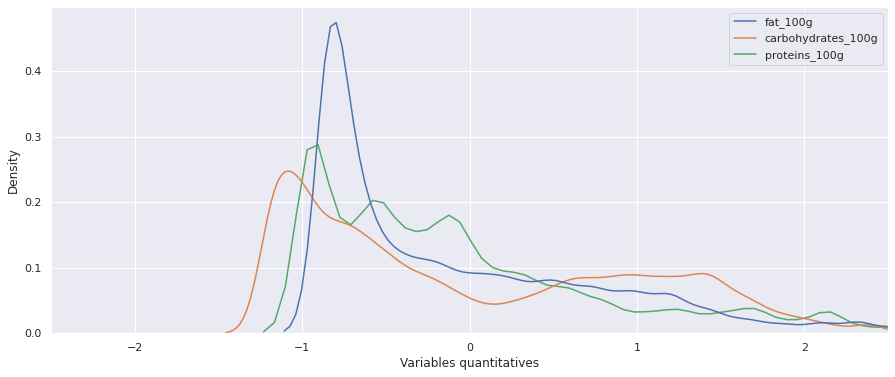

In [142]:
sns.set_theme(palette="deep")
fig, ax = plt.subplots(1,1, figsize = (15,6))

sns.kdeplot(data = df_graph, legend = True)
plt.xlim(-2.5, 2.5)
plt.xlabel('Variables quantitatives')
plt.show()

In [130]:
df_M.shape

(199446, 48)

<AxesSubplot:>

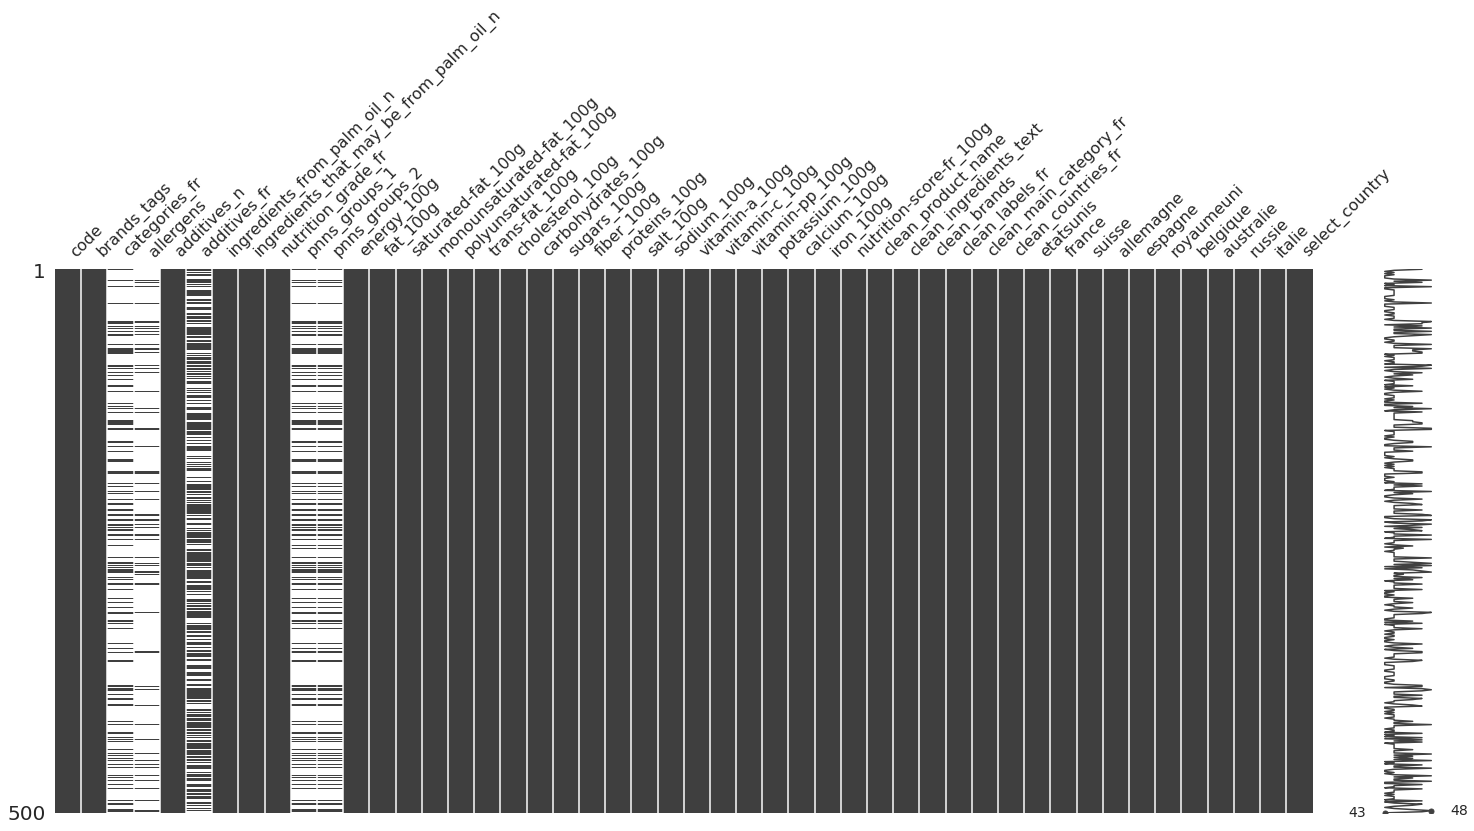

In [131]:
msno.matrix(df_M.sample(500))

In [132]:
df_M.to_csv('/home/bryan/OpenClassRoom/SantePublic/Data/df_santepublic_clean.csv')

In [133]:
df_M.shape

(199446, 48)